#### why do llm's need tokenization?

Tokens are the atomic units of text that are used to train transformers.

If we take every word as a token, all languages combined have 1.5 million words, , its not possible to train a model with this many words, because of the computational cost. If we take each character as a token, it would be computationally expensive to predict the next token at character level.

So, we need to find a way to represent the text in a way that is both efficient and meaningful.

**BPE (Byte Pair Encoding)** is a data compression technique that is used in LLMs to tokenize the text. BPE is a greedy algorithm that iteratively merges the most frequent pair of tokens until the desired vocabulary size is reached. BPE is used in GPT-2, GPT-3, and other LLMs.

#### Unicode
String is a immutable sequence of characters represented in unicode, where each character is a unicode code point. We have 1.11 million unicode code points for all languages combined.Types of unicode encodings: UTF-8, UTF-16, UTF-32. UTF-8 is the most common encoding.

In [75]:
## UTF-8 encoding of different characters with their byte representation and number of bytes.
def print_byte_info(char):
    byte_info = char.encode('utf-8')
    print(f"Character: {char}, Unicode code point: {ord(char)}, UTF-8 values: {list(byte_info)}, Number of bytes: {len(byte_info)}, Byte representation: {byte_info.hex()}")


print_byte_info('a') 
print_byte_info('¥') # yen symbol
print_byte_info('అ') # Telugu character
print_byte_info('ह')  # Hindi character
print_byte_info('ف') # Arabic character


Character: a, Unicode code point: 97, UTF-8 values: [97], Number of bytes: 1, Byte representation: 61
Character: ¥, Unicode code point: 165, UTF-8 values: [194, 165], Number of bytes: 2, Byte representation: c2a5
Character: అ, Unicode code point: 3077, UTF-8 values: [224, 176, 133], Number of bytes: 3, Byte representation: e0b085
Character: ह, Unicode code point: 2361, UTF-8 values: [224, 164, 185], Number of bytes: 3, Byte representation: e0a4b9
Character: ف, Unicode code point: 1601, UTF-8 values: [217, 129], Number of bytes: 2, Byte representation: d981


#### Lets go through details of BPE implementation.

#### **Sudo code for BPE**
```
step1 : text = "aabcaabcda"
        - len of text = 9, 
        - unique tokens = 4, {a,b,c,d} -> token size is 4
        - consecutive tokens : (a,a), (a,b), (b,c), (c,a), (a,a), (a,b), (b,c), (c,d), (d,a)
        - if we take value count of each pair, we get the following:
            {(a,a):2, (a,b):2, (b,c):2, (c,a):1, (a,b):2, (b,c):1, (c,d):1, (d,a):1}
step2 : merge the most frequent pair of tokens.
        for each iteration, merge the most frequent pair of tokens with new token.
        - merge (a,a) with new token 'e'
        - Then new text = "ebcebcda"
        - new unique tokens = 5, {a,b,c,d,e}
        - new consecutive tokens : (e,b), (b,c), (c,e), (e,b), (b,c), (c,d), (d,a)
        - if we take value count of each pair, we get the following:
            {(e,b):2, (b,c):2, (c,e):1, (e,b):2, (b,c):1, (c,d):1, (d,a):1}
        - now len of text = 8, 
        - unique tokens = 5, {a,b,c,d,e} -> token size is 5
step3 : repeat step2 until the desired vocabulary size is reached.
```

#### Lets try with a sample text.

In [10]:
sample_text = "In a small, sleepy town nestled between rolling hills, there was an old, neglected music shop called “Harmonies Lost.” Its windows were cracked, the wooden sign swayed in the breeze, and dust covered every surface inside. Most of the townsfolk had forgotten about it, passing it by as they hurried on with their busy lives. But to one person, it was a place of wonder—a place that held the key to a mystery she couldn’t let go of."

## encode the text to utf-8
tokens = sample_text.encode('utf-8')
print(list(tokens))  # Display the byte values as a list
print(len(tokens))

[73, 110, 32, 97, 32, 115, 109, 97, 108, 108, 44, 32, 115, 108, 101, 101, 112, 121, 32, 116, 111, 119, 110, 32, 110, 101, 115, 116, 108, 101, 100, 32, 98, 101, 116, 119, 101, 101, 110, 32, 114, 111, 108, 108, 105, 110, 103, 32, 104, 105, 108, 108, 115, 44, 32, 116, 104, 101, 114, 101, 32, 119, 97, 115, 32, 97, 110, 32, 111, 108, 100, 44, 32, 110, 101, 103, 108, 101, 99, 116, 101, 100, 32, 109, 117, 115, 105, 99, 32, 115, 104, 111, 112, 32, 99, 97, 108, 108, 101, 100, 32, 226, 128, 156, 72, 97, 114, 109, 111, 110, 105, 101, 115, 32, 76, 111, 115, 116, 46, 226, 128, 157, 32, 73, 116, 115, 32, 119, 105, 110, 100, 111, 119, 115, 32, 119, 101, 114, 101, 32, 99, 114, 97, 99, 107, 101, 100, 44, 32, 116, 104, 101, 32, 119, 111, 111, 100, 101, 110, 32, 115, 105, 103, 110, 32, 115, 119, 97, 121, 101, 100, 32, 105, 110, 32, 116, 104, 101, 32, 98, 114, 101, 101, 122, 101, 44, 32, 97, 110, 100, 32, 100, 117, 115, 116, 32, 99, 111, 118, 101, 114, 101, 100, 32, 101, 118, 101, 114, 121, 32, 115, 117, 

In [26]:
print(set(tokens))
print(max(tokens), min(tokens))


{128, 148, 153, 156, 157, 32, 44, 46, 66, 72, 73, 76, 77, 97, 98, 99, 100, 101, 226, 103, 104, 105, 102, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 122}
226 32


In [78]:
## ex : To compress the given text , 

# first step find byte pairs.
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts
 
stats = get_stats(tokens)
#print(stats)
sorted_stats = list(stats.items())
print(sorted(sorted_stats, key=lambda item: item[1], reverse=True)[:100])

[((104, 101), 175), ((101, 32), 175), ((116, 104), 139), ((32, 116), 136), ((100, 32), 113), ((32, 115), 111), ((116, 32), 106), ((44, 32), 96), ((32, 97), 94), ((115, 32), 86), ((105, 110), 84), ((101, 114), 78), ((32, 119), 76), ((101, 100), 74), ((110, 32), 72), ((32, 104), 72), ((97, 110), 66), ((110, 103), 62), ((46, 32), 60), ((226, 128), 53), ((111, 110), 53), ((114, 32), 52), ((101, 110), 51), ((32, 98), 48), ((32, 105), 48), ((97, 115), 46), ((114, 101), 45), ((105, 116), 45), ((104, 97), 44), ((32, 102), 44), ((109, 101), 41), ((97, 32), 40), ((115, 116), 40), ((103, 32), 40), ((119, 97), 40), ((111, 32), 39), ((32, 111), 38), ((97, 116), 38), ((110, 100), 37), ((115, 104), 36), ((32, 112), 36), ((110, 101), 35), ((104, 105), 35), ((116, 101), 34), ((32, 99), 34), ((111, 117), 34), ((32, 108), 34), ((111, 114), 33), ((101, 101), 31), ((121, 32), 31), ((115, 111), 31), ((116, 111), 30), ((118, 101), 30), ((101, 97), 30), ((108, 111), 29), ((32, 100), 29), ((101, 108), 28), ((1

In [22]:
## lets find out the most frequent pairs, mostly which are followed by spaces.
print(chr(32), chr(116))
print(chr(101), chr(32))
print(chr(110), chr(32))

  t
e  
n  


In [80]:
#### **BPE implementation**
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
    new_ids = []
    i = 0
    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            new_ids.append(idx)
            i += 2
        else:
            new_ids.append(ids[i])
            i += 1
    return new_ids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256 ## our unique tokens are 226, for our sample text.
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
    stats = get_stats(ids)
    pair = max(stats, key=stats.get)
    idx = 256 + i
    print(f"merging {pair} into a new token {idx}")
    ids = merge(ids, pair, idx)
    merges[pair] = idx
    
# print(ids)

merging (104, 101) into a new token 256
merging (32, 116) into a new token 257
merging (256, 32) into a new token 258
merging (32, 115) into a new token 259
merging (32, 97) into a new token 260
merging (105, 110) into a new token 261
merging (116, 32) into a new token 262
merging (101, 100) into a new token 263
merging (257, 258) into a new token 264
merging (46, 32) into a new token 265
merging (115, 32) into a new token 266
merging (44, 32) into a new token 267
merging (226, 128) into a new token 268
merging (111, 110) into a new token 269
merging (101, 114) into a new token 270
merging (101, 110) into a new token 271
merging (104, 97) into a new token 272
merging (261, 103) into a new token 273
merging (101, 32) into a new token 274
merging (119, 97) into a new token 275


#### Now lets try with a larger text, and observe the token size and compression ratio.

In [79]:
## now lets try with a larger text.
with open('sample_1000_words.txt', 'r') as f:
    text = f.read()

tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 just for convenience
print('---')
print(text[:200], '\n')
print("length:", len(text))
print('---')
print(tokens[:100]) ## print first 100 tokens
print("length:", len(tokens))
print('--------------------------------')

def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
    new_ids = []
    i = 0
    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            new_ids.append(idx)
            i += 2
        else:
            new_ids.append(ids[i])
            i += 1
    return new_ids

# ---
vocab_size = 1000 # the desired final vocabulary size
num_merges = vocab_size - 256 ## our unique tokens are 226, for our sample text.
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
    stats = get_stats(ids)
    if not stats:  # Check if stats is empty to avoid errors
        break
    pair = max(stats, key=stats.get)
    idx = 256 + i
    ids = merge(ids, pair, idx)
    merges[pair] = idx

print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

---
**The Forgotten Melody**

In a small, sleepy town nestled between rolling hills, there was an old, neglected music shop called “Harmonies Lost.” Its windows were cracked, the wooden sign swayed in the 

length: 5791
---
[42, 42, 84, 104, 101, 32, 70, 111, 114, 103, 111, 116, 116, 101, 110, 32, 77, 101, 108, 111, 100, 121, 42, 42, 10, 10, 73, 110, 32, 97, 32, 115, 109, 97, 108, 108, 44, 32, 115, 108, 101, 101, 112, 121, 32, 116, 111, 119, 110, 32, 110, 101, 115, 116, 108, 101, 100, 32, 98, 101, 116, 119, 101, 101, 110, 32, 114, 111, 108, 108, 105, 110, 103, 32, 104, 105, 108, 108, 115, 44, 32, 116, 104, 101, 114, 101, 32, 119, 97, 115, 32, 97, 110, 32, 111, 108, 100, 44, 32, 110]
length: 5897
--------------------------------
tokens length: 5897
ids length: 1506
compression ratio: 3.92X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.
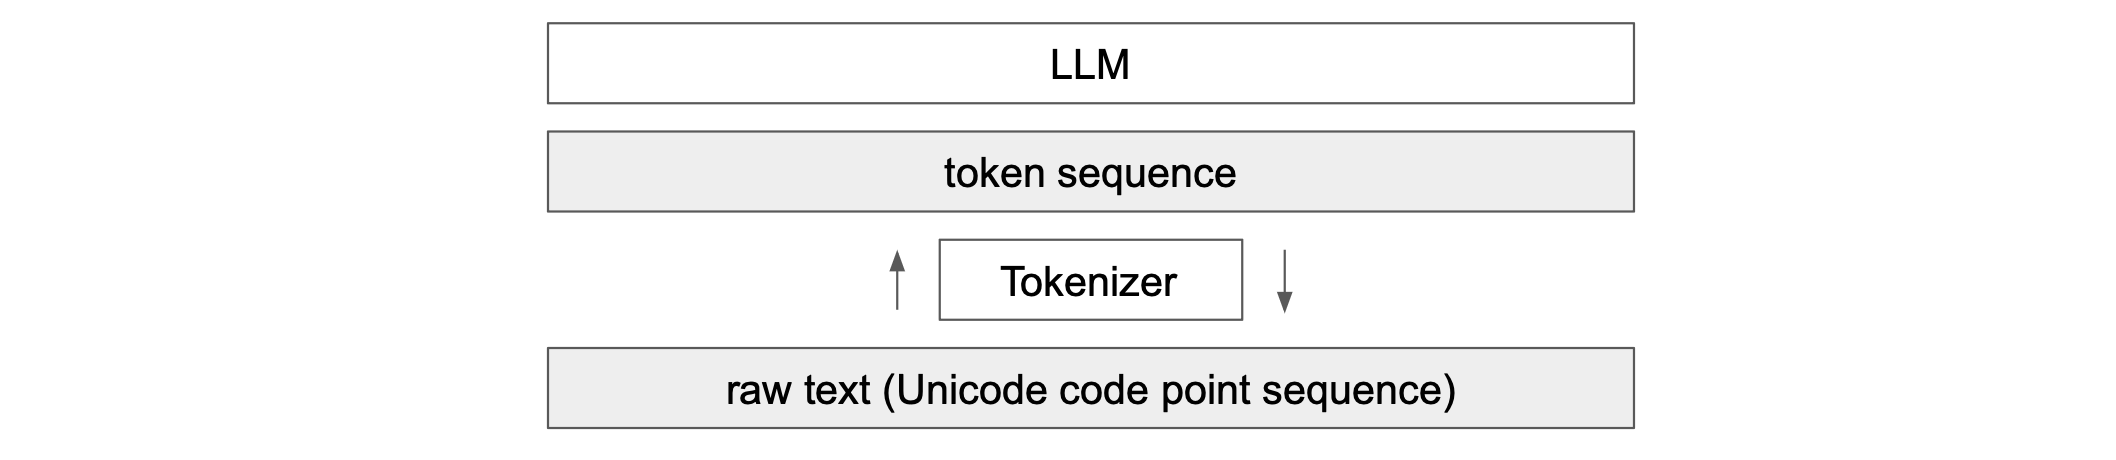

#### Now lets compare GPT-2 encoding with GPT-4, to check efficiency in space handling. 

In [83]:
!pip install tiktoken --quiet

In [86]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


# # # Let's visually compare the changes that occurred to the tokens.
# # 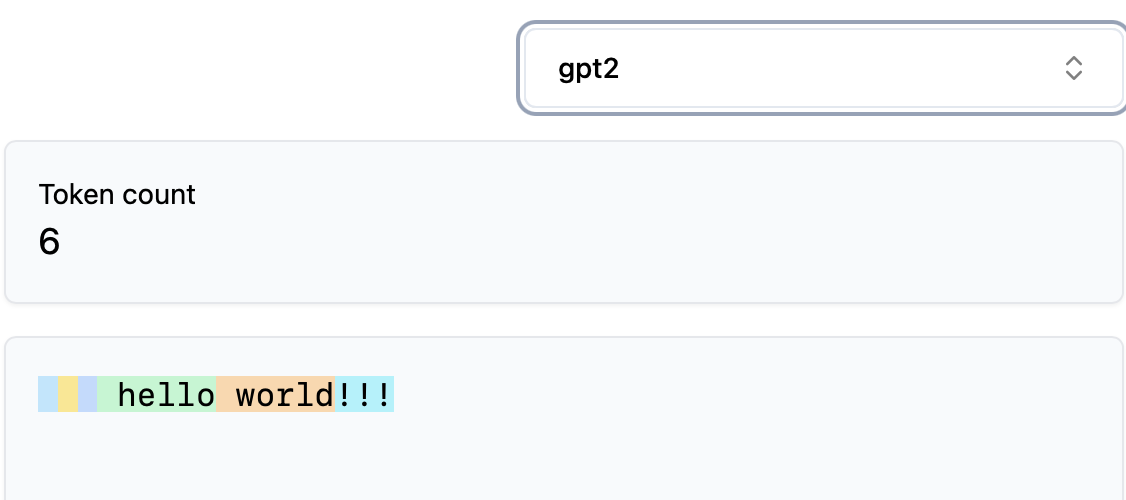{width=100}
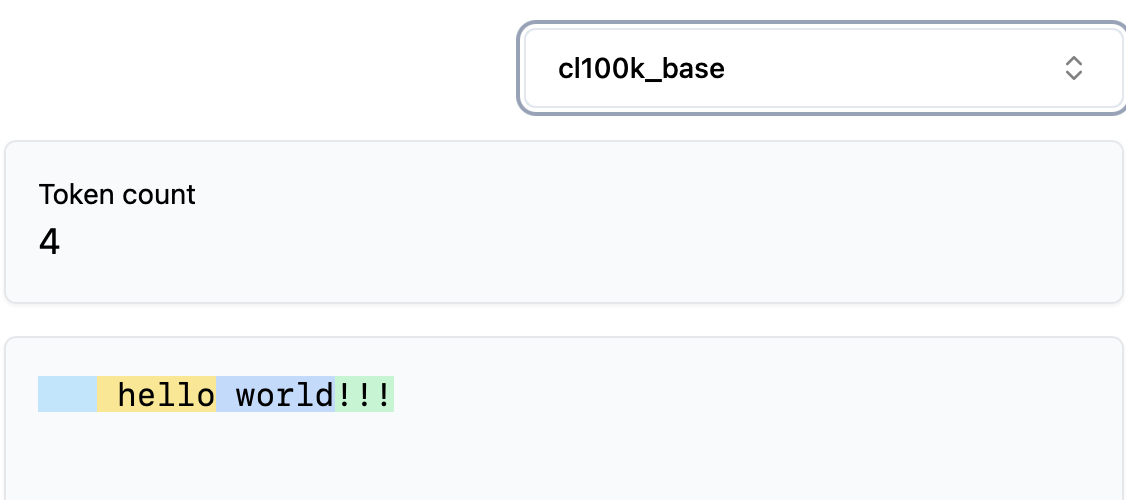{width=100}

#### More use of tiktoken.

In [87]:
cl100k_base = tiktoken.get_encoding("cl100k_base") ## which is used by GPT-4, GPT-3.5 turbo.

# In production, load the arguments directly instead of accessing private attributes
# See openai_public.py for examples of arguments for specific encodings
enc = tiktoken.Encoding(
    # If you're changing the set of special tokens, make sure to use a different name
    # It should be clear from the name what behaviour to expect.
    name="cl100k_im",
    pat_str=cl100k_base._pat_str,
    mergeable_ranks=cl100k_base._mergeable_ranks,
    special_tokens={
        **cl100k_base._special_tokens,
        "<|im_start|>": 100264,
        "<|im_end|>": 100265,
    }
)

The use of "<|im_start|>" and "<|im_end|>" helps ensure that the model processes the correct portions of text and maintains the desired structure, which can be critical in more complex systems where precise control of the input-output flow is required.

In [92]:
print(enc.encode("    hello world!!!"))

[262, 24748, 1917, 12340]
